In [10]:
from keras import layers, models
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from utils import *

In [2]:
size = 28

In [4]:
X, labels = load_images(r'C:\Users\gudko\history_envs\sklearn_env\data_knn', False, size)
le = LabelEncoder()
y = le.fit_transform(labels)
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X, y, random_state=313, test_size=0.15)

In [5]:
X_nn_train = X_nn_train.reshape((X_nn_train.shape[0], size, size, 4))
X_nn_test = X_nn_test.reshape((X_nn_test.shape[0], size, size, 4))

In [6]:
X_nn_train.shape

(2623, 28, 28, 4)

In [11]:
y_nn_train = to_categorical(y_nn_train)
y_nn_test = to_categorical(y_nn_test)

In [12]:
y_nn_train.shape

(2623, 34)

In [62]:
model = models.Sequential()

model.add(layers.Input(shape=X_nn_train.shape[1:]))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(34, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy', 'f1_score'])

In [63]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 34)                  │           2,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,746 (374.01 KB)

 Trainable params: 95,746 (374.01 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
h = model.fit(X_nn_train, y_nn_train, epochs=75, batch_size=32)

Epoch 1/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0533 - f1_score: 0.0182 - loss: 3.4709
Epoch 2/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1294 - f1_score: 0.0863 - loss: 3.0693 
Epoch 3/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2382 - f1_score: 0.1933 - loss: 2.6202 
Epoch 4/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3144 - f1_score: 0.2732 - loss: 2.2994 
Epoch 5/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3888 - f1_score: 0.3525 - loss: 2.0398 
Epoch 6/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4368 - f1_score: 0.4051 - loss: 1.8703
Epoch 7/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4865 - f1_score: 0.4602 - loss: 1.6329 
Epoch 8/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5424 - f1_score: 0.5056 - loss: 1.5004 
Epoch 9/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5669 - f1_score: 0.5396 - loss: 1.3759 
Epoch 10/75
82/82 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0

In [65]:
def show_graph(t: str):
    data = h.history[t]
    epochs = range(1, len(data) + 1)
    plt.plot(epochs, data, 'b')
    plt.title('Training ' + t)
    plt.show()

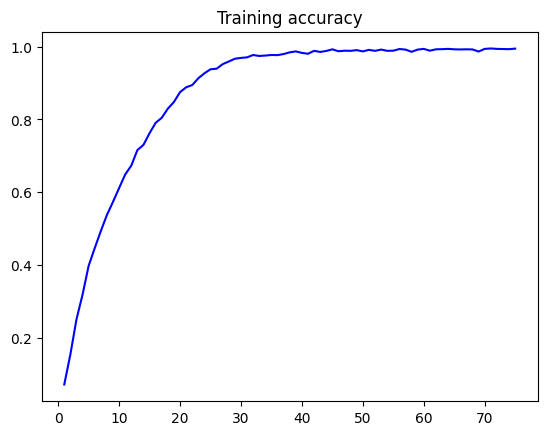

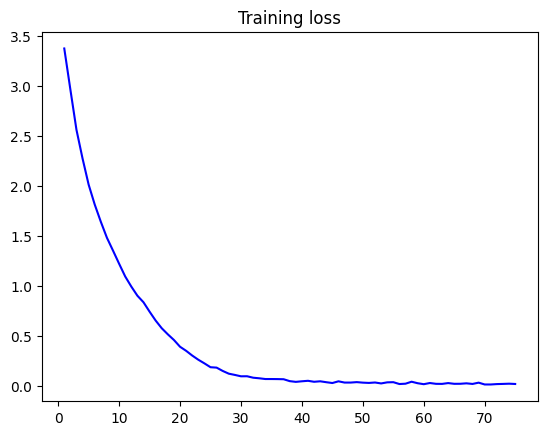

In [71]:
show_graph('accuracy')
show_graph('loss')

In [67]:
res = model.evaluate(X_nn_test, y_nn_test, return_dict=True)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6294 - f1_score: 0.5808 - loss: 3.5336 


In [68]:
res

{'accuracy': 0.6099137663841248,
 'f1_score': <tf.Tensor: shape=(34,), dtype=float32, numpy=
 array([0.57142854, 0.47368413, 0.7692307 , 0.26086953, 0.5217391 ,
        0.59259254, 0.7804878 , 0.8571428 , 0.64      , 0.34482753,
        0.81249994, 0.83333325, 0.7333333 , 0.81481475, 0.28571424,
        0.7083333 , 0.34482756, 0.8648648 , 0.46666664, 0.8484848 ,
        0.64      , 0.6896551 , 0.66666657, 0.8571428 , 0.5185185 ,
        0.36363634, 0.85714275, 0.3428571 , 0.28571424, 0.4545454 ,
        0.6666666 , 0.58823526, 0.58064514, 0.5333333 ], dtype=float32)>,
 'loss': 3.870422124862671}

In [69]:
prs = model.predict(X_nn_test)
preds = [np.argmax(p) for p in prs]

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [34]:
y_test = [np.argmax(y) for y in y_nn_test]

In [70]:
labels = le.inverse_transform(y_test)
predicts = le.inverse_transform(preds)
print_metrics(labels, predicts)

precision: 0.6434146944984541
recall: 0.6205113194398527
F1: 0.6049892920134269
